###<strong><font color='orange'>An interactive essay on preprocessing textual data taken from a website</strong></font>

#####by Martyna Kozielec
---

This interactive essay combines <weak><font color='orange'>markdown</weak></font> and programming in <weak><font color='orange'>Python</weak></font>. Step by step, it presents:
* scraping an online article from the University of Gdańsk,
* preprocessing it,
* visualising and linguistically analysing it.

In particular, the second part covers <weak><font color='orange'>tokenization</weak></font>, <weak><font color='orange'>stop word removal</weak></font>,  <weak><font color='orange'>POS tagging</weak></font>, <weak><font color='orange'>lemmatization</weak></font>, and <weak><font color='orange'>word frequencies</weak></font>.

---

###<strong><font color='orange'>Step one:</strong></font> scraping the text from the website

The first step is to *get* the website's <weak><font color='orange'>content</weak></font>, hence the name of the method. For that, a library called <weak><font color='orange'>requests</weak></font> needs to be imported. This is a Python module which allows to work with web pages. For more detail, see [W3Schools](https://www.w3schools.com/python/module_requests.asp).

The only *required* parameter for the <weak><font color='orange'>get</weak></font> method is the url of the chosen website.

In [46]:
import requests
page = requests.get("https://ug.edu.pl/news/en/8792/how-take-care-yourself-world-full-anxiety-last-meeting-semester-series-what-does-science-say-non?_gl=1*w5lehv*_ga_8BCSP4BDLX*czE3NDk3NDkzMDgkbzEkZzEkdDE3NDk3NDk2OTEkajYwJGwwJGgw")
print(page.content)

b'<!DOCTYPE html>\n<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">\n  <head>\n    <meta charset="utf-8" />\n<script async src="https://www.googletagmanager.com/gtag/js?id=UA-22577093-2"></script>\n<script>window.dataLayer = window.dataLayer || [];function gtag(){dataLayer.push(arguments)};gtag("js", new Date());gtag("config", "UA-22577093-2", {"groups":"default","anonymize_ip":true,"page_path":"\\/news\\/pl\\/8792\\/jak-zadbac-o-siebie-w-swiecie-pelnym-niepokoju-za-nami-ostatnie-w-tym-semestrze-spotkanie-z-cyklu-na"});</script>\n<link rel="canonical" href="https://ug.edu.pl/news/en/8792/how-take-care-yourself-world-full-anxiety-last-meeting

As can be seen, the output is rather difficult to work with, so it requires some cleaning. Firstly, another Python library for working with HTML files can be used, particularly [BeautifulSoup](https://www.geeksforgeeks.org/python/implementing-web-scraping-python-beautiful-soup/).

As one of parameters for <weak><font color='orange'>BeautifulSoup</weak></font>, an attribute called <weak><font color='orange'>content</weak></font> is given, which extracts the raw *content* from the HTML file (here assigned to the <weak><font color='orange'>page</weak></font> variable). The second parameter is the specific parser that is being used.

In [47]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, "html.parser")
print(soup)

<!DOCTYPE html>

<html dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
<head>
<meta charset="utf-8"/>
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-22577093-2"></script>
<script>window.dataLayer = window.dataLayer || [];function gtag(){dataLayer.push(arguments)};gtag("js", new Date());gtag("config", "UA-22577093-2", {"groups":"default","anonymize_ip":true,"page_path":"\/news\/pl\/8792\/jak-zadbac-o-siebie-w-swiecie-pelnym-niepokoju-za-nami-ostatnie-w-tym-semestrze-spotkanie-z-cyklu-na"});</script>
<link href="https://ug.edu.pl/news/en/8792/how-take-care-yourself-world-full-anxiety-last-meeting-semester-series-what-does-scie

Secondly, a method called <weak><font color='orange'>find_all</weak></font> comes in handy. It is part of the <weak><font color='orange'>BeautifulSoup</weak></font> module, and its details can be found [here](https://scrapeops.io/python-web-scraping-playbook/python-beautifulsoup-findall/). What the method does is find the chosen elements in the HTML file. These elements are specified as a parameter of the method, in this case these are all the <weak><font color='orange'>paragraphs</weak></font> in the <weak><font color='orange'>soup</weak></font> variable, always preceded by `<p>` and followed at the end by `<\p>` (as can be seen in the output above). This will allow to access the actual text from the website, and leave the rest out.

Additionally, there might appear certain unwanted details from the website's textual content, in this case the university's contact information located at the very bottom of the page. Since it does not convey much meaning linguistically speaking, it should be left out.

This can be done by specifying one of the keywords that appear in the unwanted paragraph and storing it in a list. Then, by means of a list comprehension, the code examines each paragraph (marked with `<p>`) and searches for the <weak><font color='orange'>unwanted_keywords</weak></font>; if it finds such unwanted keyword, it does not include the paragraph in which it appears in the final list <weak><font color='orange'>paragraphs</weak></font>.

In [48]:
unwanted_keywords = ["nip:", "regon:", "tel.", "ul.", "fax:", "e-mail:"]
paragraphs = [paragraph for paragraph in soup.find_all("p") if not any(keyword in paragraph.get_text().lower() for keyword in unwanted_keywords)]

print(paragraphs)

[<p><em>Photo by Filip Śmigielski</em></p>, <p><strong>‘Wars, disasters, and mental well-being. How to take care of your emotions in a disturbing reality?’ was the topic of the last meeting of the semester in the series ‘What does science say? (Non-)academic meetings’ at the University of Gdańsk Museum. What can we do to take care of our well-being? What role do other people play in this, and what about the mysterious vagus nerve? Dr Agata Rudnik, psychologist and director of the Academic Psychological Support Centre at the University of Gdańsk, talked about ways to deal with difficult emotions in turbulent times.</strong></p>, <p>The June meeting in the series ‘What does science say? (Non-)academic meetings’ enjoyed exceptional attendance - additional seats had to be brought into the intimate temporary exhibition hall at the University of Gdańsk Museum. For some of the guests, this was not their first encounter with science in the form proposed by the UG Museum on the occasion of the 

A <weak><font color='orange'>for</weak></font> loop can be used to improve the output visually in terms of its readability:

In [49]:
for element in paragraphs:
  print(element)

<p><em>Photo by Filip Śmigielski</em></p>
<p><strong>‘Wars, disasters, and mental well-being. How to take care of your emotions in a disturbing reality?’ was the topic of the last meeting of the semester in the series ‘What does science say? (Non-)academic meetings’ at the University of Gdańsk Museum. What can we do to take care of our well-being? What role do other people play in this, and what about the mysterious vagus nerve? Dr Agata Rudnik, psychologist and director of the Academic Psychological Support Centre at the University of Gdańsk, talked about ways to deal with difficult emotions in turbulent times.</strong></p>
<p>The June meeting in the series ‘What does science say? (Non-)academic meetings’ enjoyed exceptional attendance - additional seats had to be brought into the intimate temporary exhibition hall at the University of Gdańsk Museum. For some of the guests, this was not their first encounter with science in the form proposed by the UG Museum on the occasion of the uni

However, other unnecessary details still remain, and they can be disposed of using another <weak><font color='orange'>for</weak></font> loop and a method from <weak><font color='orange'>BeautifulSoup</weak></font> called [getText](https://www.educative.io/answers/how-to-use-gettext-in-beautiful-soup).

In [50]:
for element in paragraphs:
  print(element.getText())

Photo by Filip Śmigielski
‘Wars, disasters, and mental well-being. How to take care of your emotions in a disturbing reality?’ was the topic of the last meeting of the semester in the series ‘What does science say? (Non-)academic meetings’ at the University of Gdańsk Museum. What can we do to take care of our well-being? What role do other people play in this, and what about the mysterious vagus nerve? Dr Agata Rudnik, psychologist and director of the Academic Psychological Support Centre at the University of Gdańsk, talked about ways to deal with difficult emotions in turbulent times.
The June meeting in the series ‘What does science say? (Non-)academic meetings’ enjoyed exceptional attendance - additional seats had to be brought into the intimate temporary exhibition hall at the University of Gdańsk Museum. For some of the guests, this was not their first encounter with science in the form proposed by the UG Museum on the occasion of the university's 55th anniversary. The idea behind

This loop can be combined with the <weak><font color='orange'>append</weak></font> method to store the results permanently in a list called <weak><font color='orange'>only_text</weak></font>.

Additionally, the <weak><font color='orange'>strip</weak></font> method from <weak><font color='orange'>BeautifulSoup</weak></font> removes all the whitespaces at the beginning and end of a given string.

Then, only the elements which are not empty, i.e. have the <weak><font color='orange'>len</weak></font>gth of more than zero, are added to the list. In the output above, such instances appear in the few last lines. Below, they will not become part of the <weak><font color='orange'>only_text</weak></font> list.

In [51]:
only_text = []
for element in paragraphs:
  text = element.getText().strip()

  if len(text) > 0:
    only_text.append(text)

for element in only_text:
  print(element)

Photo by Filip Śmigielski
‘Wars, disasters, and mental well-being. How to take care of your emotions in a disturbing reality?’ was the topic of the last meeting of the semester in the series ‘What does science say? (Non-)academic meetings’ at the University of Gdańsk Museum. What can we do to take care of our well-being? What role do other people play in this, and what about the mysterious vagus nerve? Dr Agata Rudnik, psychologist and director of the Academic Psychological Support Centre at the University of Gdańsk, talked about ways to deal with difficult emotions in turbulent times.
The June meeting in the series ‘What does science say? (Non-)academic meetings’ enjoyed exceptional attendance - additional seats had to be brought into the intimate temporary exhibition hall at the University of Gdańsk Museum. For some of the guests, this was not their first encounter with science in the form proposed by the UG Museum on the occasion of the university's 55th anniversary. The idea behind

Although the content still contains some "noise", it is much more comprehensible and ready for preprocessing, which will be delineated in the following section.

---

###<strong><font color='orange'>Step two:</strong></font> preprocessing the textual data

####<strong><font color='orange'>Tokenization</strong></font>

Firstly, a Python library with various natural language processing tools needs to be imported, called <weak><font color='orange'>Natural Language Toolkit</weak></font>. For the purpose of turning the sentences in <weak><font color='orange'>only_text</weak></font> list into separate words (i.e. tokenizing them), <weak><font color='orange'>word_tokenize</weak></font> also needs to be imported. Just to be safe and avoid a potential error, `punkt_tab` should also be downloaded.

Here is some information regarding [Natural Language Toolkit](https://www.nltk.org/) and [word_tokenize](https://realpython.com/nltk-nlp-python/), if needed.

In [52]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

The elements of <weak><font color='orange'>only_text</weak></font> need to be accessed using list comprehension. Then, they can be simultaneously tokenized using <weak><font color='orange'>word_tokenize</weak></font> from the <weak><font color='orange'>NLTK</weak></font> module.

In [53]:
tokenized_characters = [word_tokenize(element) for element in only_text]

for sublst_of_tokens in tokenized_characters:
  print(sublst_of_tokens)

['Photo', 'by', 'Filip', 'Śmigielski']
['‘', 'Wars', ',', 'disasters', ',', 'and', 'mental', 'well-being', '.', 'How', 'to', 'take', 'care', 'of', 'your', 'emotions', 'in', 'a', 'disturbing', 'reality', '?', '’', 'was', 'the', 'topic', 'of', 'the', 'last', 'meeting', 'of', 'the', 'semester', 'in', 'the', 'series', '‘', 'What', 'does', 'science', 'say', '?', '(', 'Non-', ')', 'academic', 'meetings', '’', 'at', 'the', 'University', 'of', 'Gdańsk', 'Museum', '.', 'What', 'can', 'we', 'do', 'to', 'take', 'care', 'of', 'our', 'well-being', '?', 'What', 'role', 'do', 'other', 'people', 'play', 'in', 'this', ',', 'and', 'what', 'about', 'the', 'mysterious', 'vagus', 'nerve', '?', 'Dr', 'Agata', 'Rudnik', ',', 'psychologist', 'and', 'director', 'of', 'the', 'Academic', 'Psychological', 'Support', 'Centre', 'at', 'the', 'University', 'of', 'Gdańsk', ',', 'talked', 'about', 'ways', 'to', 'deal', 'with', 'difficult', 'emotions', 'in', 'turbulent', 'times', '.']
['The', 'June', 'meeting', 'in', 't

This creates a nested list named <weak><font color='orange'>tokenized_characters</weak></font>, with all the sentences from <weak><font color='orange'>only_text</weak></font> split into their smaller constituents, i.e. tokens. Unfortunately, there are punctuation marks and other characters that are redundant but still included. They will vary depending on the input from the chosen website, and can be predefined below in the <weak><font color='orange'>characters</weak></font> list. Apart from that, an empty list needs to be created, where the final result will be stored with the desired <weak><font color='orange'>tokenized_words</weak></font>.

Thus, both lists will prove useful in deleting the unneeded characters from the final tokenized output in the <weak><font color='orange'>for</weak></font> loop, while keeping the rest.

In [54]:
characters = [",", ".", ":", "=", "-", "'", ")", "(", "‘", "?", "!", "’", "–", "+", "..."]
tokenized_words = []

Again, using list comprehension, the nested list <weak><font color='orange'>tokenized_characters</weak></font> is turned into one list, and its elements are accessed. If these elements are *not* part of the predefined <weak><font color='orange'>characters</weak></font> list, they will be added to the <weak><font color='orange'>tokenized_words</weak></font> list.

In [55]:
for element in [word for sublist in tokenized_characters for word in sublist]:
  if element not in characters:
    tokenized_words.append(element.lower())

And here is the *final* result, with only the complete, meaningful words (for the most part):

In [56]:
for word in tokenized_words:
  print(word)

photo
by
filip
śmigielski
wars
disasters
and
mental
well-being
how
to
take
care
of
your
emotions
in
a
disturbing
reality
was
the
topic
of
the
last
meeting
of
the
semester
in
the
series
what
does
science
say
non-
academic
meetings
at
the
university
of
gdańsk
museum
what
can
we
do
to
take
care
of
our
well-being
what
role
do
other
people
play
in
this
and
what
about
the
mysterious
vagus
nerve
dr
agata
rudnik
psychologist
and
director
of
the
academic
psychological
support
centre
at
the
university
of
gdańsk
talked
about
ways
to
deal
with
difficult
emotions
in
turbulent
times
the
june
meeting
in
the
series
what
does
science
say
non-
academic
meetings
enjoyed
exceptional
attendance
additional
seats
had
to
be
brought
into
the
intimate
temporary
exhibition
hall
at
the
university
of
gdańsk
museum
for
some
of
the
guests
this
was
not
their
first
encounter
with
science
in
the
form
proposed
by
the
ug
museum
on
the
occasion
of
the
university
's
55th
anniversary
the
idea
behind
the
non
academic
meeting

---

####<strong><font color='orange'>Stop word removal</strong></font>

*For the most part*, because there are some contractions, for instance `n't`, or the so-called <weak><font color='orange'>stop words</weak></font>, e.g. prepositions. Such words serve mostly grammatical purposes; therefore, they do not seem as valuable for potential analysis as <weak><font color='orange'>content words</weak></font> do.

For removing those, <weak><font color='orange'>nltk.coprus</weak></font> and <weak><font color='orange'>stopwords</weak></font> will be used. For information regarding this package and word list, see [this link](https://www.nltk.org/howto/corpus.html).

In [57]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

The <weak><font color='orange'>stop_words</weak></font> variable will store only the unique elements from the English stop words that are predefined in the <weak><font color='orange'>NLTK</weak></font> module.

In [58]:
stop_words = set(stopwords.words("english"))
print(stop_words)

{'how', 'should', 'up', "we've", "it'd", 'that', 'needn', 'who', 'don', "she'd", 'before', "hadn't", 'couldn', "she'll", 'doesn', 'being', 'above', 'be', 'mightn', 'because', 'from', 'o', 'haven', 'didn', 'below', 'a', 're', 'are', 'where', "i'd", 'again', 'just', "that'll", 'until', 'not', 'ma', 'ourselves', 'won', "he's", 'such', 'themselves', 'will', 's', 'himself', "she's", "i've", 'was', "needn't", "he'd", 'wasn', "you've", 'all', 'doing', "he'll", "isn't", 'our', 'during', 'to', 'under', 'in', 'itself', 'does', 'through', 'what', 'yourselves', 'her', 'have', 'ain', 'been', 'me', 'shouldn', 'mustn', 'over', 'about', "won't", "i'm", "mustn't", "you'd", 't', "weren't", 'and', 'i', 'your', 'theirs', "couldn't", 'them', 'my', 'but', 'as', 'weren', "aren't", 'had', 'his', 'which', 'did', 'if', 'both', 'he', "it'll", "they're", 'each', 'am', "wouldn't", 'we', 'further', "they'll", 'their', 'for', 'can', 'isn', 'no', 'it', "shan't", 'very', 'the', 'an', "we're", 'few', 'shan', 'with', "h

The code examines the words in the <weak><font color='orange'>tokenized_words</weak></font> list, removes the <weak><font color='orange'>stop_words</weak></font>, and stores the result in the <weak><font color='orange'>no_stops1</weak></font> list.

In [59]:
no_stops1 = [word for word in tokenized_words if not word.lower() in stop_words]

Some unnecessary words might still remain, because the stop words predefined by the <weak><font color='orange'>NLTK</weak></font> module cannot predict the specifics of all the texts that the users might work with.

Again, these can be defined in the list below according to one's needs:

In [60]:
words_to_remove = ["us", "n't", "'s", "'ll", "ll", "a.", "'ve", "non-", "non", "e.g"]

And then a very similar list comprehension needs to be done, but this time the words from <weak><font color='orange'>words_to_remove</weak></font> list are removed, while the rest is stored in the <weak><font color='orange'>no_stops2</weak></font> list.

In [61]:
no_stops2 = [word for word in no_stops1 if word not in words_to_remove]

The outcome is the following, with the contractions and stop words now gone:

In [62]:
for word in no_stops2:
    print(word)

photo
filip
śmigielski
wars
disasters
mental
well-being
take
care
emotions
disturbing
reality
topic
last
meeting
semester
series
science
say
academic
meetings
university
gdańsk
museum
take
care
well-being
role
people
play
mysterious
vagus
nerve
dr
agata
rudnik
psychologist
director
academic
psychological
support
centre
university
gdańsk
talked
ways
deal
difficult
emotions
turbulent
times
june
meeting
series
science
say
academic
meetings
enjoyed
exceptional
attendance
additional
seats
brought
intimate
temporary
exhibition
hall
university
gdańsk
museum
guests
first
encounter
science
form
proposed
ug
museum
occasion
university
55th
anniversary
idea
behind
academic
meetings
bring
science
people
discuss
current
important
social
issues
would
like
invite
discussion
safe
space
talk
minds
encouraged
dr
agata
rudnik
beginning
meeting
referring
work
hospital
gastroenterology
ward
cope
disturbing
reality
first
worth
remembering
various
negative
emotions
reactions
anxiety
difficulty
sleeping
experi

---

####<strong><font color='orange'>POS tagging and lemmatization</strong></font>

The output is looking much better than at the beginning, and it can be further broken down using other NLP tools available as part of the <weak><font color='orange'>Natural Language Toolkit</weak></font>.

Starting with <weak><font color='orange'>POS tagging</weak></font> and <weak><font color='orange'>lemmatization</weak></font>, for the purpose of which the following function and class from <weak><font color='orange'>NLTK</weak></font> are needed:

* [<weak><font color='orange'>pos_tag</weak></font>](https://www.nltk.org/api/nltk.tag.pos_tag.html)
* [<weak><font color='orange'>WordNetLemmatizer</weak></font>](https://www.nltk.org/api/nltk.stem.WordNetLemmatizer.html?highlight=wordnet)

In [63]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger_eng")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

<weak><font color='orange'>WordNet</weak></font> is a lexical database with mappings of words and their base forms, i.e. <weak><font color='orange'>lemmas</weak></font>. The <weak><font color='orange'>pos_tag</weak></font> annotates words with their <weak><font color='orange'>part of speech</weak></font>, i. e. pos.

These will be necessary for lemmatization to function more accurately. Without POS tags, <weak><font color='orange'>NLTK</weak></font>'s <weak><font color='orange'>WordNetLemmatizer</weak></font> only works for regular plural nouns, and does not seem to do much with verb forms. The output below demonstrates that:

In [64]:
lemmatizer = WordNetLemmatizer()
example1 = lemmatizer.lemmatize("apples")
example2 = lemmatizer.lemmatize("went")
print(example1)
print(example2)

apple
went


For that reason, the parts of speech for words in <weak><font color='orange'>no_stops2</weak></font> list are tagged according to <weak><font color='orange'>NLTK</weak></font>'s <weak><font color='orange'>pos_tag</weak></font>.

The words are lemmatized using <weak><font color='orange'>WordNetLemmatizer</weak></font>, but this time based on the tagged parts of speech. In the <weak><font color='orange'>for</weak></font> loop, if, elif, and else statements have been added to fix incompatibile POS tags between <weak><font color='orange'>pos_tag</weak></font> and <weak><font color='orange'>WordNet</weak></font>.

This ensures that lemmatization will be more case-sensitive than by default, where only nouns seem to have been taken into consideration.

In [65]:
lemmatizer = WordNetLemmatizer()

tagged_words = pos_tag(no_stops2)

lemmatized_words = []

for word, tag in tagged_words:
    first_char = tag[0].lower()
    if first_char == "j":
        pos = "a"
    elif first_char in {"n", "v", "r"}:
        pos = first_char
    else:
        pos = "n"

    lemmatized_words.append(lemmatizer.lemmatize(word, pos=pos))

The result:

In [66]:
for lemma in lemmatized_words:
  print(lemma)

photo
filip
śmigielski
war
disaster
mental
well-being
take
care
emotion
disturb
reality
topic
last
meeting
semester
series
science
say
academic
meeting
university
gdańsk
museum
take
care
well-being
role
people
play
mysterious
vagus
nerve
dr
agata
rudnik
psychologist
director
academic
psychological
support
centre
university
gdańsk
talk
way
deal
difficult
emotion
turbulent
time
june
meeting
series
science
say
academic
meeting
enjoy
exceptional
attendance
additional
seat
bring
intimate
temporary
exhibition
hall
university
gdańsk
museum
guest
first
encounter
science
form
propose
ug
museum
occasion
university
55th
anniversary
idea
behind
academic
meeting
bring
science
people
discuss
current
important
social
issue
would
like
invite
discussion
safe
space
talk
mind
encourage
dr
agata
rudnik
begin
meet
refer
work
hospital
gastroenterology
ward
cope
disturb
reality
first
worth
remember
various
negative
emotion
reaction
anxiety
difficulty
sleep
experience
completely
natural
help
feel
devote
lot
t

---

####<strong><font color='orange'>Dictionary with word counts</strong></font>

The list <weak><font color='orange'>lemmatized_words</weak></font> now contains the cleaned textual data from the online article, but there are some repetitions which can be counted. There is a Python [class](https://www.geeksforgeeks.org/python/python-counter-objects-elements/) designed specifically for that.

In [67]:
from collections import Counter

The first step is to create a dictionary that will store the lemmatized words as keys, and their counts as values. The <weak><font color='orange'>Counter</weak></font> class will take one parameter - the list with lemmatized words that includes the repetitions.

In [68]:
word_counts = Counter(lemmatized_words)

Finally, the words can be displayed alongside their summed occurences in the article. They will appear from the most frequent to the least frequent ones thanks to the <weak><font color='orange'>most_common</weak></font> method.

In [69]:
word_counts = Counter({word: count for word, count in word_counts.items() if count > 2})

print("----Word Frequency (Count > 2)----")
for word, count in word_counts.most_common():
    print(f"{word}: {count}")

----Word Frequency (Count > 2)----
take: 8
people: 8
worth: 8
meeting: 7
rudnik: 7
feel: 7
care: 6
agata: 6
say: 5
nerve: 5
remember: 5
help: 5
go: 5
also: 5
mental: 4
science: 4
academic: 4
university: 4
museum: 4
vagus: 4
dr: 4
time: 4
important: 4
experience: 4
something: 4
sometimes: 4
need: 4
even: 4
make: 4
emotion: 3
gdańsk: 3
psychological: 3
way: 3
social: 3
would: 3
meet: 3
fight: 3
well: 3
stress: 3
brain: 3
good: 3
responsible: 3
step: 3
know: 3
read: 3
relationship: 3
health: 3


---

###<strong><font color='orange'>Step three:</strong></font> visualising and analysing the results

The purpose of preprocessing in this interactive essay was to extract the most meaningful textual data from the online article and analyse it *linguistically*. To do so, the words and their counts can be visualised more nicely in form of a chart, which can be created with the help of [<weak><font color='orange'>Pyplot</weak></font>](https://matplotlib.org/stable/tutorials/pyplot.html).

In [70]:
import matplotlib.pyplot as plt

Then, the specifics of the chart are established in the code below, e.g.:
* displaying the words in order (most frequent ones &rarr; least frequent ones)
* the sizing of the chart,
* the colour of the bars,
* the titles and labels, including the font size or rotation.

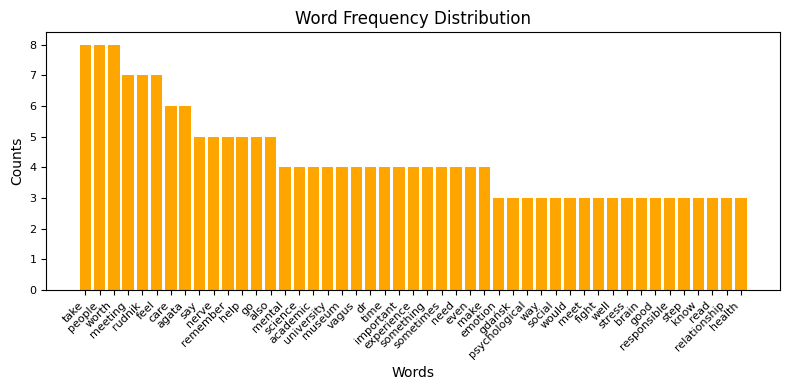

In [71]:
sorted_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
words = [item[0] for item in sorted_counts]
counts = [item[1] for item in sorted_counts]

plt.figure(figsize=(8, 4))
bars = plt.bar(words, counts, color="orange")

plt.xlabel("Words", fontsize=10)
plt.ylabel("Counts", fontsize=10)
plt.title("Word Frequency Distribution", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

Based on some of the most frequent nouns, verbs, and adjectives from the text:

| Nouns                     | Verbs                        | Adjectives  |
|---------------------------|------------------------------|-------------|
|emotion                    | take + care                  |psychological|
|brain                      | feel                         |mental       |
|nerve                      | fight                        |             |
|stress                     | need                         |             |
|health                     | help                         |             |

it seems that the major focus in the article is bringing awareness to psychological well-being that a person - possibly a student - should tend to.

Therefore, it can be said that the article has a positive reinforcement on the members of its academic society, considering the broader context in which it appears. Especially since there are other words such as `social`, `relationship`, `people`, `meet` which could be used to emphasise the idea of strengthening the social bonds, perhaps amongst students.

Simultaneously, based on other words such as `science`, `vagus`, `museum`, `university`, `dr`, the language in the article seems to be matter-of-fact, drawing from scholarly opinions and evidence. In that way, it might appear as more convincing to the reader, and it certainly suits the fact that it is part of University of Gdańsk's website.

<img src="https://thumbs.dreamstime.com/b/bright-orange-round-d-emoji-character-smiling-happily-giving-thumbs-up-isolated-clean-white-background-perfect-379610835.jpg" width="200" alt="smiley face">

---